## **Unzip the dataset**

In [ ]:
!unzip "/content/fake-news.zip"

Archive:  /content/fake-news.zip
replace submit.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## Import the required Librares

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Data Preprocessing

In [ ]:
#load the data using pandas
data = pd.read_csv('train.csv')


In [ ]:
#visualize a section of the data
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
#describe my data
data.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [ ]:
#check the dimension of the datapoint
data.shape

(20800, 5)

In [ ]:
#check for missing values in each column
missing_values_train = data.isnull()

#total missing values for each column
total_missing_values_train = missing_values_train.sum()

In [ ]:
#print the total missing values for each column
print(total_missing_values_train)

id           0
title      558
author    1957
text        39
label        0
dtype: int64


In [ ]:
#total missing values across train the dataset
dataset_missing_value_train = total_missing_values_train.sum()

dataset_missing_value_train

2554

In [ ]:
print(f'The percentage of missing values is: {(dataset_missing_value_train / data.shape[0] ) * 100:.2f} %')

The percentage of missing values is: 12.28 %


In [ ]:
print(data.isnull().sum())

id           0
title      558
author    1957
text        39
label        0
dtype: int64


In [ ]:
#drop the nan value
data = data.dropna()

In [ ]:
print(data.isnull().sum())

id        0
title     0
author    0
text      0
label     0
dtype: int64


In [ ]:
#create independent and dependent variables
X = data['text'].values
y = data.iloc[:, -1].values

## Preprocessing and Analysis of News Column

In [ ]:
#import the necessary libraries
from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def preprocess_text(text_data):
	preprocessed_text = []

	for sentence in tqdm(text_data):
		sentence = re.sub(r'[^\w\s]', '', sentence)
		preprocessed_text.append(' '.join(token.lower()
								for token in str(sentence).split()
								if token not in stopwords.words('english')))

	return preprocessed_text


In [ ]:
#preprocess the text column for train dataset

preprocess_review = preprocess_text(X)

100%|██████████| 18285/18285 [34:54<00:00,  8.73it/s]


In [ ]:
X = preprocess_review

## Let’s visualize the WordCloud for fake and real news separately.

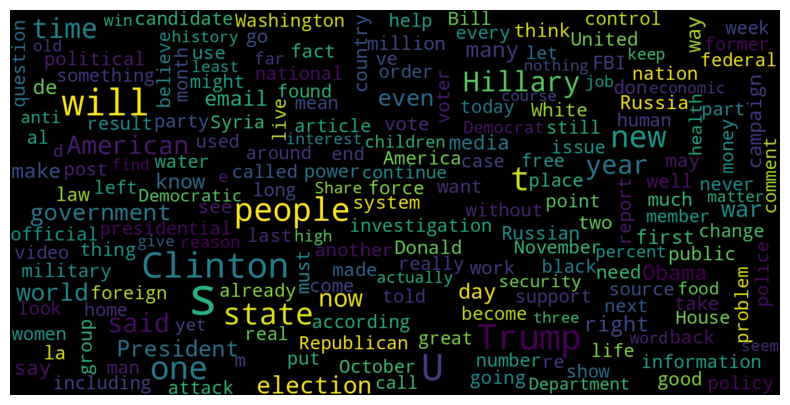

In [ ]:
#real - class ==1
#get all real news as list of words separated by spaces
consolidated = ' '.join ([word for word in data.loc[data['label'] == 1, 'text'].astype(str)])

#define wordcloud
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)

#visualize your result
plt.figure(figsize=(10, 5))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

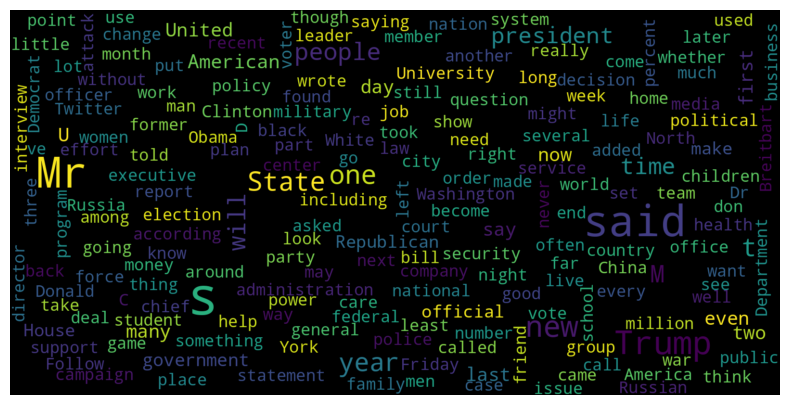

In [ ]:
#fake - class == 0
#get all fake news as list of words separated by spaces
consolidated = ' '.join ([word for word in data.loc[data['label'] == 0, 'text'].astype(str)])

#define wordcloud
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)

#visualize your result
plt.figure(figsize=(10, 5))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

## Now, Let’s plot the bargraph of the top 20 most frequent words.

<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

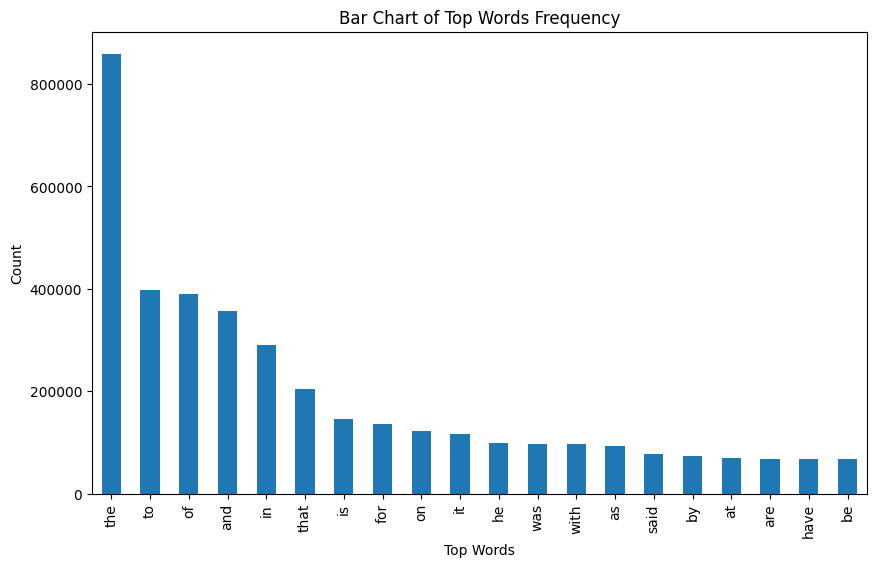

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]


common_words = get_top_n_words(data['text'], 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])

df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel="Top Words",
    ylabel="Count",
    title="Bar Chart of Top Words Frequency"
)

## Converting text into Vectors

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer instance
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training text data
X_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the test text data
X_test = tfidf_vectorizer.transform(X_test)


## Model training, Evaluation, and Prediction

In [ ]:
#using logistic regression

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#make prediction on test data
from sklearn.metrics import confusion_matrix, accuracy_score
y_predict = model.predict(X_test)


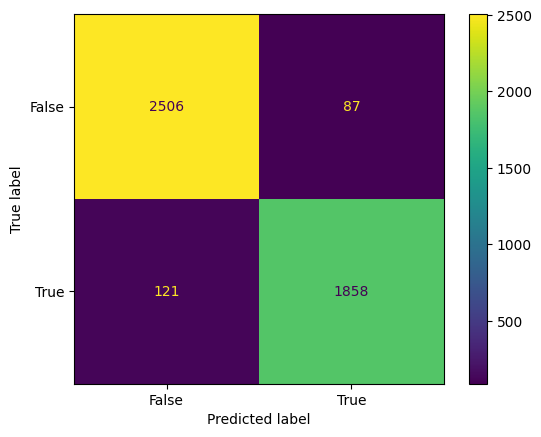

In [ ]:
# Confusion matrix of Results from Logistic Regression classification
from sklearn import metrics
confusion_m = metrics.confusion_matrix(y_test, y_predict)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_m,
											display_labels=[False, True])

cm_display.plot()
plt.show()


In [ ]:
accuracy_score(y_test, y_predict)

0.9545056867891514

In [ ]:
#using Decision Tress for the classification
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
#make prediction on test data
y_predict = model.predict(X_test)

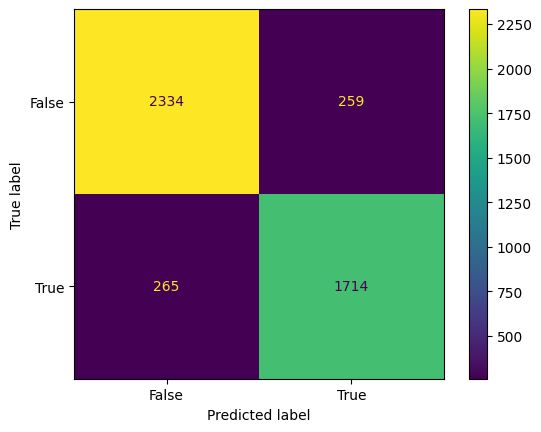

In [ ]:
# Confusion matrix of Results from Decision Tree classification
confusion_m = metrics.confusion_matrix(y_test, y_predict)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_m,
											display_labels=[False, True])

cm_display.plot()
plt.show()


In [ ]:
accuracy_score(y_test, y_predict)

0.8853893263342082

In [ ]:
#using Naive bayes for the classification
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

model.fit(X_train, y_train)


MultinomialNB()

In [ ]:
#make prediction on test data
y_predict = model.predict(X_test)

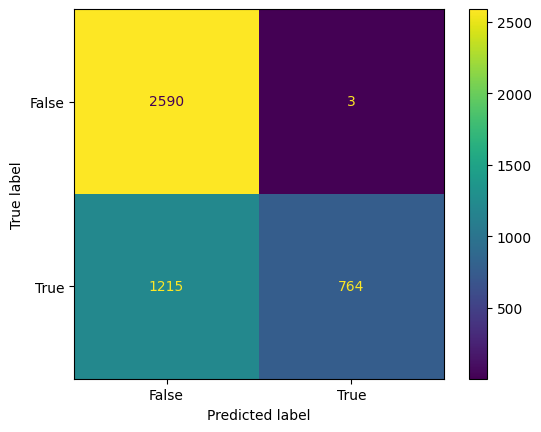

In [ ]:
# Confusion matrix of Results from Naive bayes classification
confusion_m = metrics.confusion_matrix(y_test, y_predict)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_m,
											display_labels=[False, True])

cm_display.plot()
plt.show()


In [ ]:
accuracy_score(y_test, y_predict)

0.7335958005249343

In [ ]:
#using support vector machine for the classification
from sklearn.svm import LinearSVC

model = LinearSVC()

model.fit(X_train, y_train)

LinearSVC()

In [ ]:
#make prediction on test data
y_predict = model.predict(X_test)

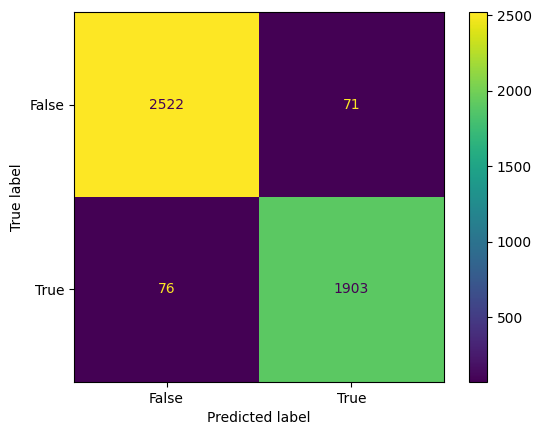

In [ ]:
# Confusion matrix of Results from support Vector machine classification
confusion_m = metrics.confusion_matrix(y_test, y_predict)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_m,
											display_labels=[False, True])

cm_display.plot()
plt.show()


In [ ]:
accuracy_score(y_test, y_predict)

0.9678477690288714